In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=528159831f5cec81bcc735cc79d4424a


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(51.87955038593353, 65.8221766491979),
 (39.13024814469128, -130.27720499918482),
 (-51.61622108639581, -132.61009984963906),
 (73.78315078165193, 14.080359649827756),
 (55.381024894355136, -85.2944846795452),
 (80.1518513480589, -3.6759342021101986),
 (54.09208001551045, -167.55637366798757),
 (69.22538995205255, -114.53788650686879),
 (28.15672927964792, -63.24864019815246),
 (80.99256165994498, -83.07209695788119),
 (26.792500693521518, -134.26008586977855),
 (82.0443424308992, -142.9882309845301),
 (64.09845771109042, -121.86114595284187),
 (58.69428245487393, -169.31375146104807),
 (0.33733092344252213, 87.95454408758116),
 (-55.05834911334772, 27.162104674909273),
 (-15.065953334795765, 15.941771536946618),
 (39.009064981242176, 9.81786495452613),
 (-70.99850558173178, -38.36849188587584),
 (-63.80979001995849, -111.85667136552212),
 (-66.75098211907864, -149.10010887671126),
 (79.53662029923868, 122.68163317993088),
 (-34.941698706092396, -158.66658312209069),
 (-87.04317940162

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates


[(51.87955038593353, 65.8221766491979),
 (39.13024814469128, -130.27720499918482),
 (-51.61622108639581, -132.61009984963906),
 (73.78315078165193, 14.080359649827756),
 (55.381024894355136, -85.2944846795452),
 (80.1518513480589, -3.6759342021101986),
 (54.09208001551045, -167.55637366798757),
 (69.22538995205255, -114.53788650686879),
 (28.15672927964792, -63.24864019815246),
 (80.99256165994498, -83.07209695788119),
 (26.792500693521518, -134.26008586977855),
 (82.0443424308992, -142.9882309845301),
 (64.09845771109042, -121.86114595284187),
 (58.69428245487393, -169.31375146104807),
 (0.33733092344252213, 87.95454408758116),
 (-55.05834911334772, 27.162104674909273),
 (-15.065953334795765, 15.941771536946618),
 (39.009064981242176, 9.81786495452613),
 (-70.99850558173178, -38.36849188587584),
 (-63.80979001995849, -111.85667136552212),
 (-66.75098211907864, -149.10010887671126),
 (79.53662029923868, 122.68163317993088),
 (-34.941698706092396, -158.66658312209069),
 (-87.04317940162

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #print('i am here')
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
(cities)

['esil',
 'fortuna',
 'rikitea',
 'barentsburg',
 'attawapiskat',
 'bethel',
 'yellowknife',
 'hamilton',
 'qaanaaq',
 'pacific grove',
 'aklavik',
 'norman wells',
 'provideniya',
 'hambantota',
 'kruisfontein',
 'caconda',
 'sinnai',
 'ushuaia',
 'punta arenas',
 'mataura',
 'tiksi',
 'avarua',
 'mar del plata',
 'hithadhoo',
 'saint-pierre',
 'ermoupolis',
 'geraldton',
 'kodiak',
 'busselton',
 'corcoran',
 'albany',
 'agirish',
 'vila franca do campo',
 'atuona',
 'praia da vitoria',
 'meadow lake',
 'illoqqortoormiut',
 'wahiawa',
 'kaitangata',
 'trincomalee',
 'murray bridge',
 'bargal',
 'ribeira grande',
 'apastovo',
 'tuktoyaktuk',
 'simao',
 'luderitz',
 'east london',
 'flinders',
 'saint george',
 'amderma',
 'cayenne',
 'dikson',
 'carnarvon',
 'karratha',
 'kenai',
 'mayor pablo lagerenza',
 'zhigansk',
 'jamestown',
 'porkhov',
 'krasnovishersk',
 'xining',
 'najran',
 'port elizabeth',
 'chuy',
 'lufilufi',
 'corinto',
 'krasnogvardeyskiy',
 'laranjal paulista',
 'hob

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count}  | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1  | esil
Processing Record 2 of Set 1  | fortuna
Processing Record 3 of Set 1  | rikitea
Processing Record 4 of Set 1  | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1  | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1  | bethel
Processing Record 7 of Set 1  | yellowknife
Processing Record 8 of Set 1  | hamilton
Processing Record 9 of Set 1  | qaanaaq
Processing Record 10 of Set 1  | pacific grove
Processing Record 11 of Set 1  | aklavik
Processing Record 12 of Set 1  | norman wells
Processing Record 13 of Set 1  | provideniya
Processing Record 14 of Set 1  | hambantota
Processing Record 15 of Set 1  | kruisfontein
Processing Record 16 of Set 1  | caconda
Processing Record 17 of Set 1  | sinnai
Processing Record 18 of Set 1  | ushuaia
Processing Record 19 of Set 1  | punta arenas
Processing Record 20 of Set 1  | mataura
Processing Record 21 of Set 1  | tik

Processing Record 35 of Set 4  | menomonie
Processing Record 36 of Set 4  | shenjiamen
Processing Record 37 of Set 4  | kudahuvadhoo
Processing Record 38 of Set 4  | divnomorskoye
Processing Record 39 of Set 4  | santa cruz
Processing Record 40 of Set 4  | krasnyy profintern
Processing Record 41 of Set 4  | zapolyarnyy
Processing Record 42 of Set 4  | tocopilla
Processing Record 43 of Set 4  | huarmey
Processing Record 44 of Set 4  | coari
Processing Record 45 of Set 4  | ayni
Processing Record 46 of Set 4  | iwaki
Processing Record 47 of Set 4  | sistranda
Processing Record 48 of Set 4  | muli
Processing Record 49 of Set 4  | enshi
Processing Record 50 of Set 4  | hofn
Processing Record 1 of Set 5  | amuntai
Processing Record 2 of Set 5  | lumphat
Processing Record 3 of Set 5  | husavik
Processing Record 4 of Set 5  | darnetal
Processing Record 5 of Set 5  | saskylakh
Processing Record 6 of Set 5  | port augusta
Processing Record 7 of Set 5  | tvardica
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 21 of Set 8  | zavodoukovsk
Processing Record 22 of Set 8  | erenhot
Processing Record 23 of Set 8  | bolshaya atnya
City not found. Skipping...
Processing Record 24 of Set 8  | katangli
Processing Record 25 of Set 8  | sudak
Processing Record 26 of Set 8  | barra do garcas
Processing Record 27 of Set 8  | vallenar
Processing Record 28 of Set 8  | arlit
Processing Record 29 of Set 8  | la spezia
Processing Record 30 of Set 8  | verkhoyansk
Processing Record 31 of Set 8  | khormuj
City not found. Skipping...
Processing Record 32 of Set 8  | locri
Processing Record 33 of Set 8  | tshela
Processing Record 34 of Set 8  | imeni zhelyabova
Processing Record 35 of Set 8  | bessonovka
Processing Record 36 of Set 8  | ilulissat
Processing Record 37 of Set 8  | puerto baquerizo moreno
Processing Record 38 of Set 8  | centralia
Processing Record 39 of Set 8  | talas
Processing Record 40 of Set 8  | georgetown
Processing Record 41 of Set 8  | bolshaya 

Processing Record 2 of Set 12  | west odessa
Processing Record 3 of Set 12  | pithoro
Processing Record 4 of Set 12  | palmares
Processing Record 5 of Set 12  | mareeba
Processing Record 6 of Set 12  | yusva
City not found. Skipping...
Processing Record 7 of Set 12  | alekseyevka
Processing Record 8 of Set 12  | rasulnagar
Processing Record 9 of Set 12  | wahran
City not found. Skipping...
Processing Record 10 of Set 12  | bressuire
Processing Record 11 of Set 12  | clyde river
Processing Record 12 of Set 12  | kismayo
Processing Record 13 of Set 12  | ruidoso
Processing Record 14 of Set 12  | purworejo
Processing Record 15 of Set 12  | dawlatabad
Processing Record 16 of Set 12  | marion
Processing Record 17 of Set 12  | hualmay
Processing Record 18 of Set 12  | matara
Processing Record 19 of Set 12  | pryozerne
Processing Record 20 of Set 12  | langsa
Processing Record 21 of Set 12  | arrifes
Processing Record 22 of Set 12  | casino
Processing Record 23 of Set 12  | shivrajpur
Process

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esil,51.96,66.40,32.67,84,27,9.80,KZ,2020-10-22 15:55:51
1,Fortuna,40.60,-124.16,41.00,100,1,4.70,US,2020-10-22 15:55:51
2,Rikitea,-23.12,-134.97,73.90,77,100,16.35,PF,2020-10-22 15:55:52
3,Bethel,41.37,-73.41,68.00,82,90,2.17,US,2020-10-22 15:55:52
4,Yellowknife,62.46,-114.35,23.00,85,90,9.17,CA,2020-10-22 15:54:40
5,Hamilton,39.18,-84.53,73.00,73,75,11.41,US,2020-10-22 15:53:52
6,Qaanaaq,77.48,-69.36,20.05,94,100,4.70,GL,2020-10-22 15:55:52
7,Pacific Grove,36.62,-121.92,57.20,100,90,5.82,US,2020-10-22 15:52:06
8,Aklavik,68.22,-135.01,15.80,78,90,6.93,CA,2020-10-22 15:55:52
9,Norman Wells,65.28,-126.83,3.20,84,75,4.70,CA,2020-10-22 15:55:53


In [9]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esil,KZ,2020-10-22 15:55:51,51.96,66.40,32.67,84,27,9.80
1,Fortuna,US,2020-10-22 15:55:51,40.60,-124.16,41.00,100,1,4.70
2,Rikitea,PF,2020-10-22 15:55:52,-23.12,-134.97,73.90,77,100,16.35
3,Bethel,US,2020-10-22 15:55:52,41.37,-73.41,68.00,82,90,2.17
4,Yellowknife,CA,2020-10-22 15:54:40,62.46,-114.35,23.00,85,90,9.17
...,...,...,...,...,...,...,...,...,...
562,Lasa,IT,2020-10-22 15:57:32,46.62,10.70,57.00,70,40,8.05
563,Masalli,KR,2020-10-22 15:57:32,34.80,126.66,55.40,54,0,18.34
564,Celestun,MX,2020-10-22 15:57:32,20.87,-90.40,84.34,70,25,0.51
565,Pestravka,RU,2020-10-22 15:57:32,52.41,49.96,33.98,82,1,4.63


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


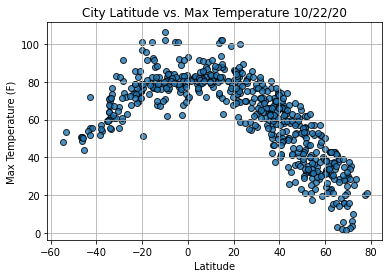

In [13]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

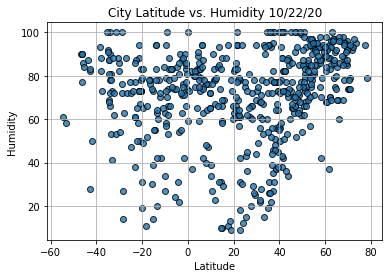

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

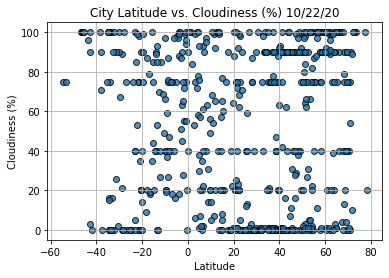

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

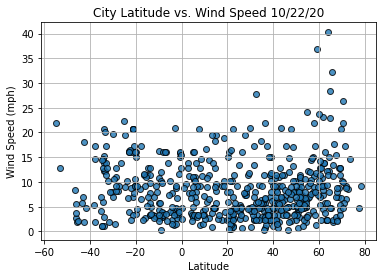

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()